In [15]:
from edahelper import *
wsb = pd.read_pickle("../Data/subreddit_WallStreetBets/otherdata/wsb_cleaned.pkl")

In [12]:
wsb.columns

Index(['Unnamed: 0', 'title', 'author', 'created_datetime_utc', 'selftext',
       'url', 'upvote_ratio', 'ups', 'total_awards_received', 'num_comments',
       'num_crossposts', 'is_self', 'is_video', 'media_only', 'id',
       'created_utc', 'selftext_html', 'author_fullname'],
      dtype='object')

## Which day of the week gets the most posts?

<AxesSubplot:xlabel='day'>

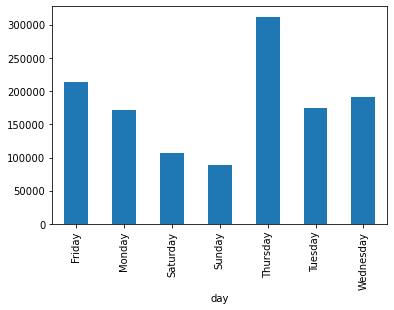

In [16]:
day_of_the_week = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
wsb['day'] = wsb['created_datetime_utc'].apply( lambda x :day_of_the_week[x.weekday()] )
#wsb.groupby('day').agg('count')
wsb.groupby('day').agg('count')['title'].plot(kind = 'bar')
# Note that this disagrees with https://www.kaggle.com/sprakshith/beginner-s-guide-to-sentiment-analysis
# ... possibly because of biases in that data set, or because of time zone differences.


## More granular time bucketing

Bucketing by hours passed since the start of the week (sunday at ? ).

Yellow bars in the time series plot denote the end of a 24 hour period since start of week.

In [68]:
wsb['weektime'] = wsb['created_datetime_utc'].apply( lambda x : x.weekday()*24 + x.hour)
# Gets the number of hours since the start of the week

wsb['weektime_chunked'] = wsb['weektime'].apply( lambda x : 2 * int(x/2))

In [71]:

def plot_stat(stat = 'sum', feature = 'ups'):
    # plots stat of feature grouped by weektime

    fig, ax = plt.subplots(figsize=(26, 9))

    agged_df = wsb[wsb.ups >= 2000][[feature, 'weektime']].groupby('weektime').agg(stat)
    agged_df.plot(ax = ax, kind = 'bar')

    max_count = max(agged_df[feature])
    min_count = min(agged_df[feature])
    num = int(max_count - min_count)
    #adding vertical line for midnight (in utc)
    for i in range(7):
        ax.plot( np.zeros(num) + i*24 ,np.linspace( min_count, max_count,num),color = 'orange',linewidth=2.0)


In [ ]:
### What time of the week gets the most submissions?

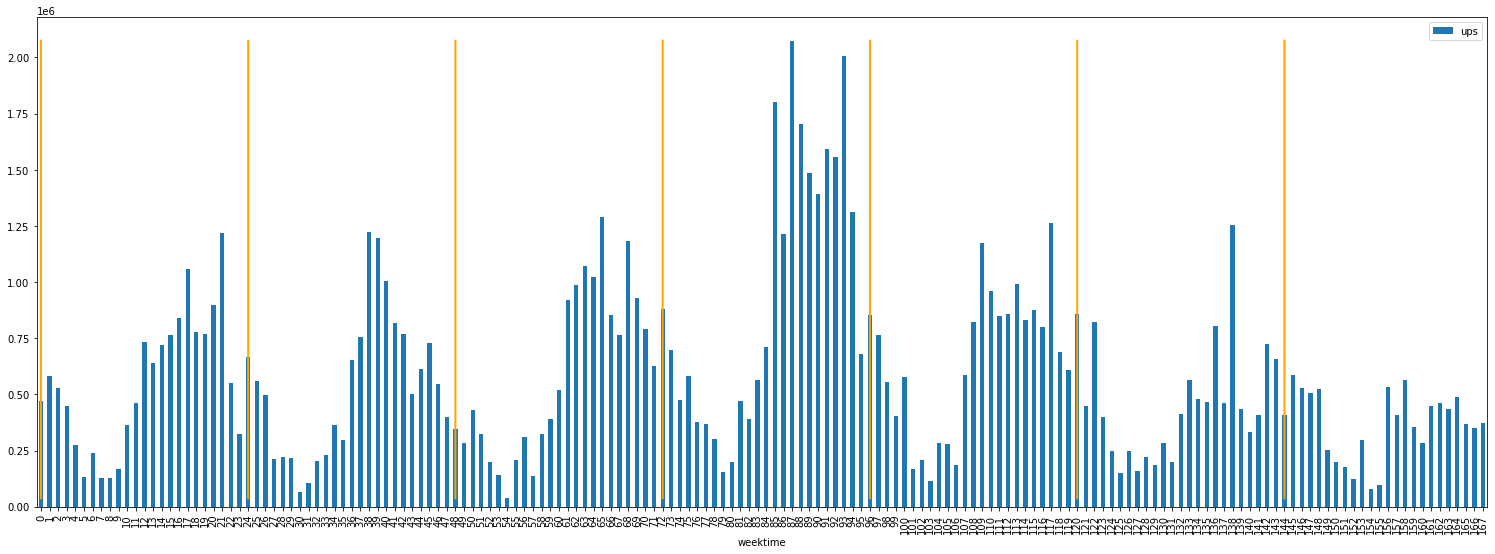

In [72]:
plot_stat('sum', 'ups')

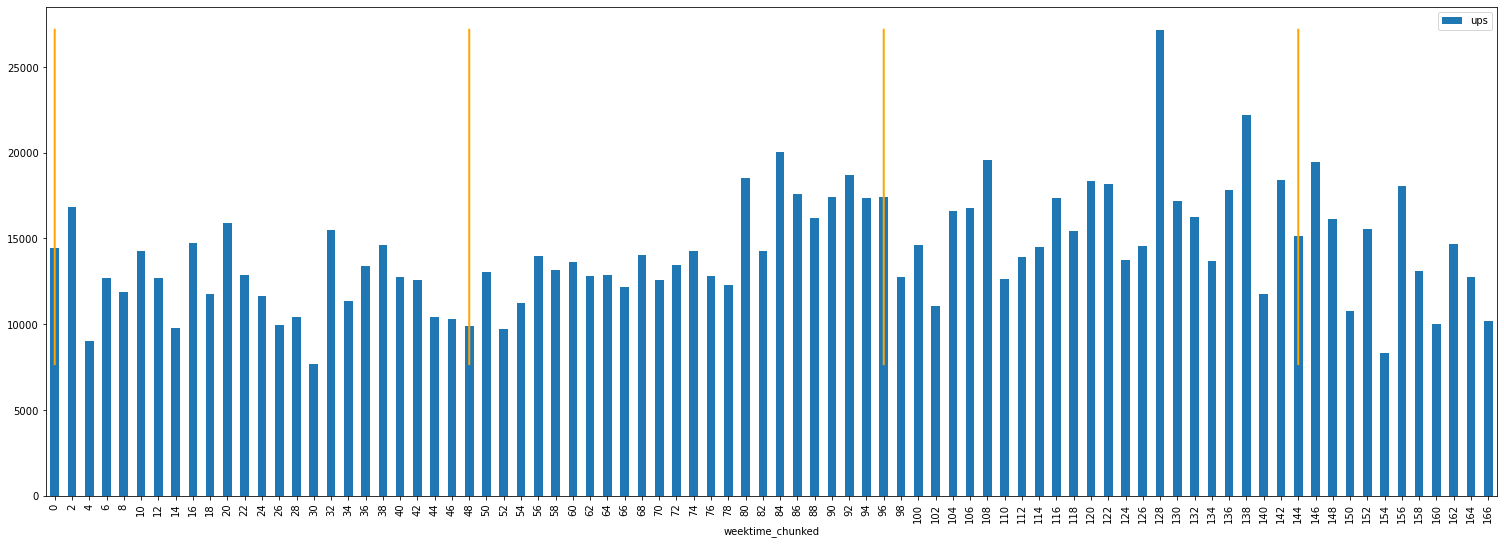

In [69]:
plot_stat('mean', 'ups')

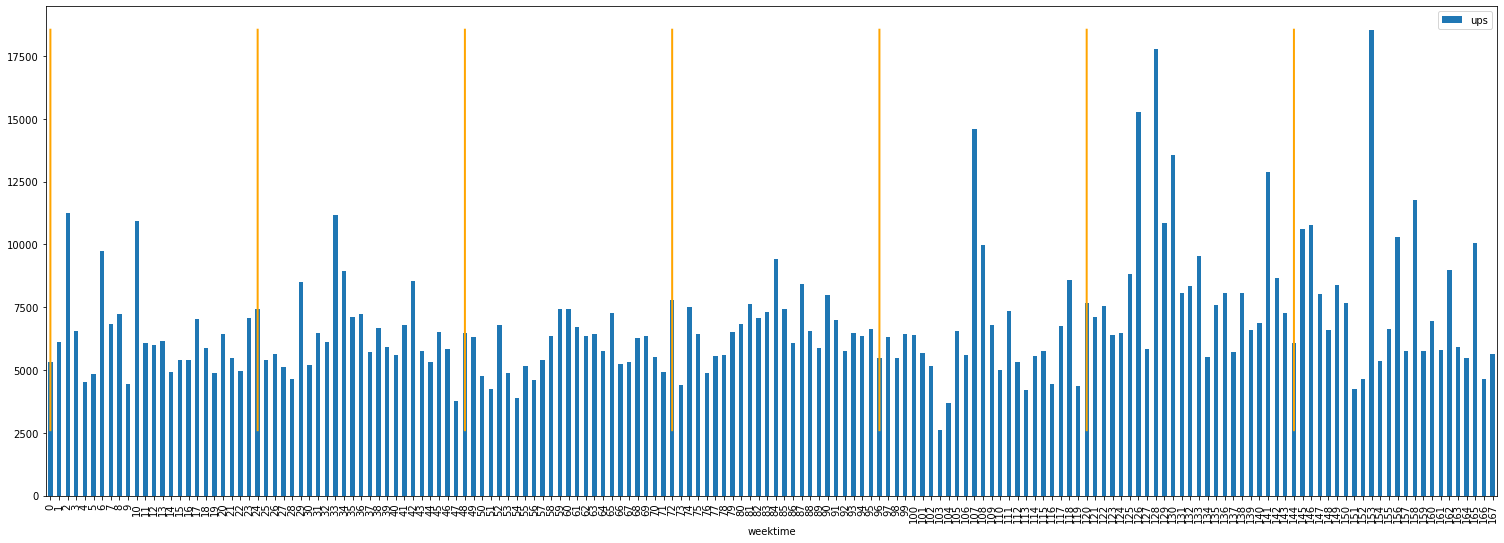

In [73]:
plot_stat('median', 'ups')

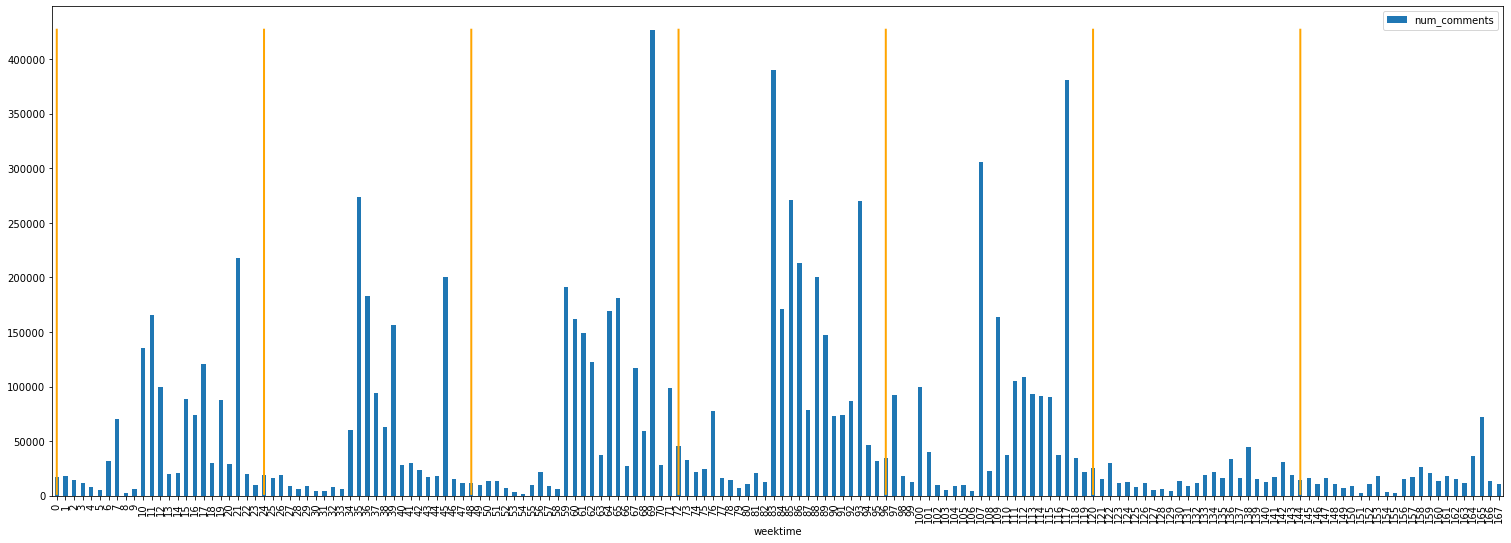

In [10]:
# Total number of comments
plot_stat('sum', 'num_comments')

## Long term trends:

<AxesSubplot:xlabel='created_datetime_utc', ylabel='ups'>

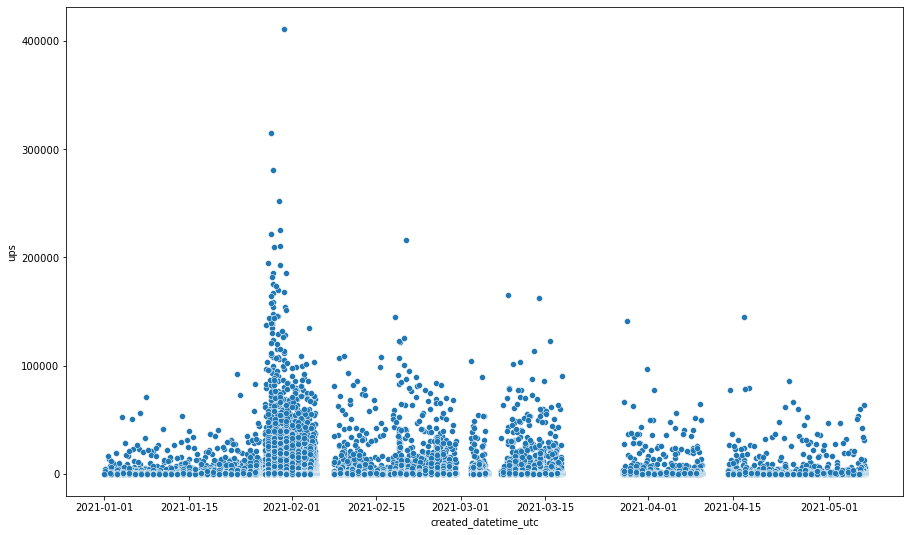

In [15]:


fig, ax = plt.subplots(figsize=(15, 9))
sns.scatterplot(data = wsb[wsb["ups"] >= 40], x = "created_datetime_utc", y = "ups")

# Note the missing dates! This is discussed in the readme.

<AxesSubplot:xlabel='created_datetime_utc', ylabel='ups'>

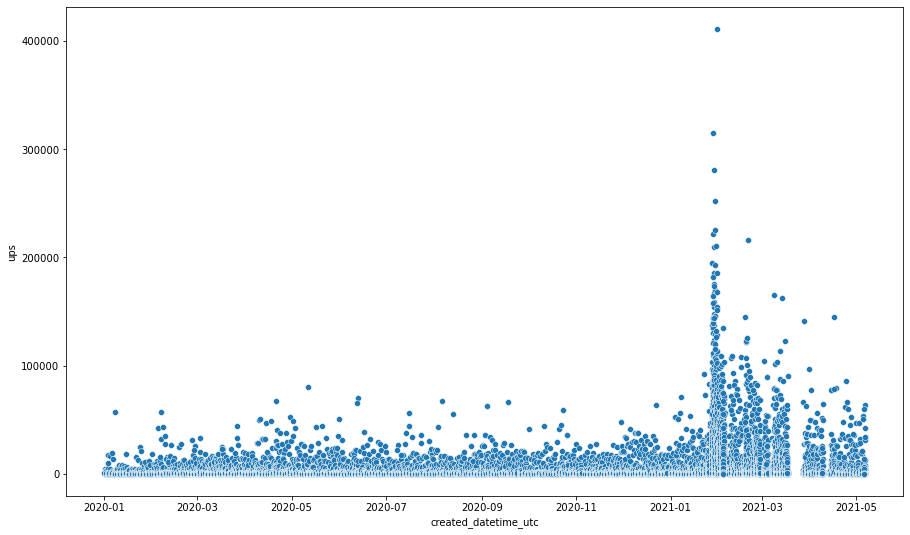

In [40]:
fig, ax = plt.subplots(figsize=(15, 9))


sns.scatterplot(ax=ax, data = wsb[wsb["ups"] >= 40], x = "created_datetime_utc", y = "ups")

In [41]:

#wsb[['date']] = wsb.created_datetime_utc.apply(lambda x : x.date())



In [53]:

agged = wsb[wsb.ups <= 10][['date', 'ups']].groupby("date").agg("sum")
fig, ax = plt.subplots(figsize=(15, 9))
sns.scatterplot(ax=ax, data = agged, x = "date", y = "ups")

<AxesSubplot:xlabel='date', ylabel='ups'>

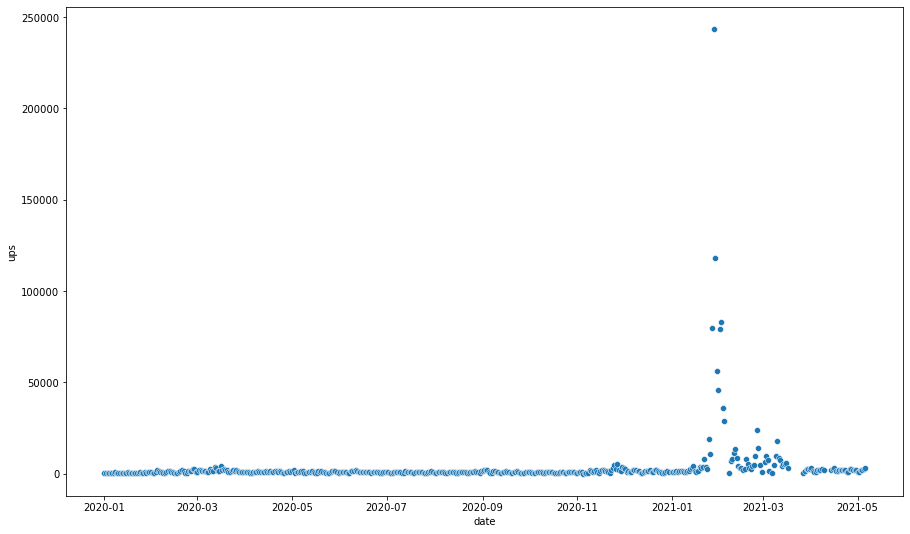

<AxesSubplot:xlabel='date', ylabel='ups'>

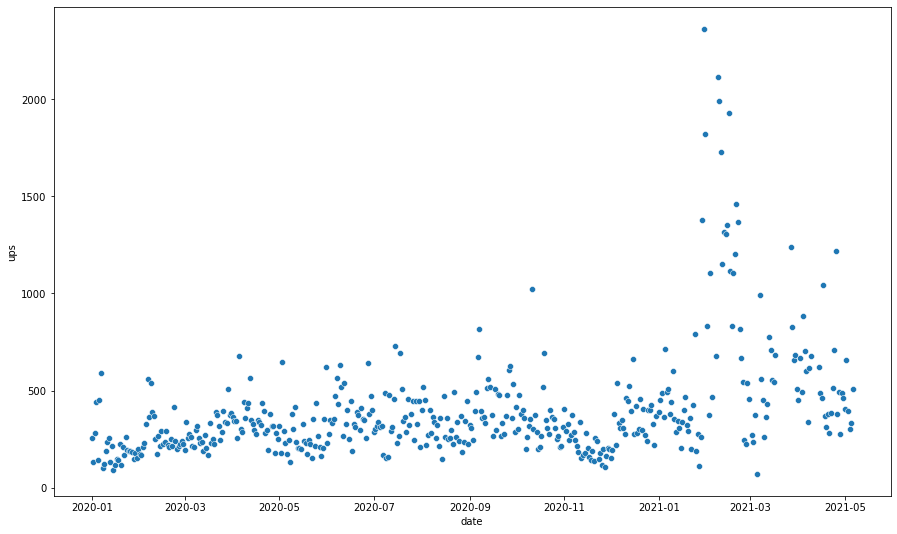

In [59]:
#
agged = wsb[wsb.ups > 1][['date', 'ups']].groupby("date").agg("mean")
fig, ax = plt.subplots(figsize=(15, 9))
sns.scatterplot(ax=ax, data = agged, x = "date", y = "ups")